# Cursland

## Ejercicio de Derivadas #21

[Canal de Youtube](https://www.youtube.com/@Cursland)

[Lista de Reproducción de Derivadas](https://youtube.com/playlist?list=PLa4T14UYWeoUW2eNMSSkLiq5c6ivgAxuq&feature=shared)

### La función es:

<IPython.core.display.Math object>

La función en latex es: x^{\frac{3}{2}} \tan{\left(x \right)}


### La derivada es:

<IPython.core.display.Math object>

La derivada en latex es: x^{\frac{3}{2}} \left(\tan^{2}{\left(x \right)} + 1\right) + \frac{3 \sqrt{x} \tan{\left(x \right)}}{2}


### La respuesta es: CORRECTA

<IPython.core.display.Math object>

La respuesta en latex es: x^{\frac{3}{2}} \sec^{2}{\left(x \right)} + \frac{3 \sqrt{x} \tan{\left(x \right)}}{2}


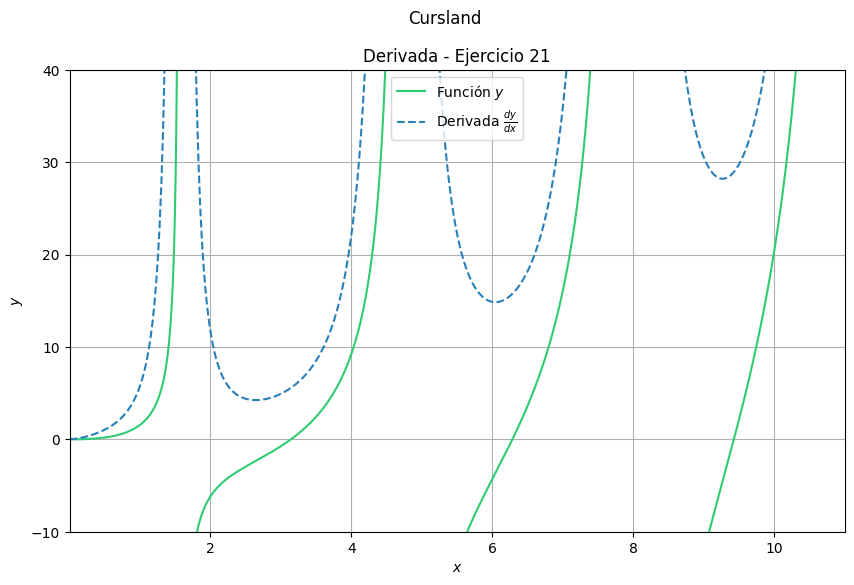

In [14]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Markdown
from math import pi


x = sp.symbols('x')

#
# ÁLGEBRA
#

y = x**sp.Rational(3, 2) * sp.tan(x)
dy_dx = sp.diff(y, x)
respuesta = (sp.Rational(3, 2) * x**sp.Rational(1, 2) * sp.tan(x)) + (x**sp.Rational(3, 2) * sp.sec(x)**2)

# Comprobamos si la derivada propuesta es correcta
es_correcta = sp.simplify(dy_dx - respuesta) == 0

# Mostramos la función y la derivada
display(Markdown("### La función es:"))
display(Math(sp.latex(y)))
print(f"La función en latex es: {sp.latex(y)}")

display(Markdown("### La derivada es:"))
display(Math(sp.latex(dy_dx)))
print(f"La derivada en latex es: {sp.latex(dy_dx)}")

mensaje = 'CORRECTA' if es_correcta else 'INCORRECTA'
display(Markdown(f"### La respuesta es: {mensaje}"))
display(Math(sp.latex(respuesta)))
print(f"La respuesta en latex es: {sp.latex(respuesta)}")


#
# GRÁFICA
#

def graficar(f, intervalos, grafica, etiqueta, estilo, color):
    grafica.xlabel('$x$')
    grafica.ylabel('$y$')
    grafica.grid(True)

    for intervalo in intervalos:
        inicio = intervalo[0]
        fin = intervalo[1]
        
        x_vals = np.linspace(inicio, fin, 400)
            
        y_vals = [f(x_val) for x_val in x_vals]
        
        #Si es el primero, agregamos la etiqueta
        if intervalo == intervalos[0]:
            grafica.plot(x_vals, y_vals, label=etiqueta, linestyle=estilo, color=color) 
        else:
            grafica.plot(x_vals, y_vals, linestyle=estilo, color=color)

def potencia_fraccionaria(x, n, m):
    signo = np.sign(x)
    x = abs(x)
    x = x ** (1/m)
    x = x * signo
    return x ** n

def funcion(x) -> float:
    numerador = potencia_fraccionaria(x, 3, 2)
    return numerador * np.tan(x)

def derivada(x) -> float:
    a_numerador = 3 * potencia_fraccionaria(x, 1, 2)
    a = a_numerador / 2 * np.tan(x)
    
    b_numerador = potencia_fraccionaria(x, 3, 2)
    b = b_numerador * (1 / np.cos(x))**2
        
    return a + b

plt.figure(figsize=(10, 6))
plt.title("Derivada - Ejercicio 21")
plt.suptitle("Cursland")
plt.margins(0)

# Graficamos la función
graficar(funcion, [
    (0.001, pi/2-0.001), (pi/2+0.001, pi*1.5-0.001),
    (pi*1.5+0.001, pi*2.5-0.001), (pi*2.5+0.001, pi*3.5-0.001)
], plt, "Función $y$", "solid", "#2ecc71")
graficar(derivada, [(0.001, 10)], plt, "Derivada $\\frac{dy}{dx}$", "--", "#2980b9")

# Personalización de la gráfica
plt.ylim(-10, 40)
plt.legend()

# Guardar la gráfica
plt.savefig("Ejercicio_21.svg", format='svg')
plt.savefig("Ejercicio_21.png", format='png', dpi=300)

plt.show()
